In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import plotly.express as px

In [3]:
# set working directory
os.chdir('../..')
os.getcwd()

'c:\\Users\\user\\Downloads\\ten_academy\\week1\\Week1-10Academy-User-Analysis'

In [4]:

from src.plots import Plot

In [28]:
plot = Plot()

In [5]:
# execute query from table xdr_data in database
df = pd.read_csv('data/outliers_clean.csv')

In [43]:
from db.db_connection import Database
from src.preprocess import PreProcess
db_connection = Database()
db_connection.connect()
query = "SELECT * FROM xdr_data"
df_query = db_connection.execute_query(query)

Connected to the database.


In [6]:
# show first 5 rows of the dataframe
df.head()

,bearer_id,start,start_ms,end,end_ms,dur._(ms),imsi,msisdn/number,imei,last_location_name,...,youtube_dl_(bytes),youtube_ul_(bytes),netflix_dl_(bytes),netflix_ul_(bytes),gaming_dl_(bytes),gaming_ul_(bytes),other_dl_(bytes),other_ul_(bytes),total_ul_(bytes),total_dl_(bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0
4,1.311448e+19,4/13/2019 8:41,612.0,4/25/2019 8:16,168.0,1035261.0,2.082014e+14,3.366537e+10,8.676270e+13,9.16456701058919E+015,...,7234465.0,1886295.0,13231006.0,17981760.0,44796223.0,14084934.0,803653557.0,10649768.0,47925246.0,70562047.0


In [7]:
# check column names
df_query.columns

Index(['bearer_id', 'start', 'start_ms', 'end', 'end_ms', 'dur._(ms)', 'imsi',
       'msisdn/number', 'imei', 'last_location_name', 'avg_rtt_dl_(ms)',
       'avg_rtt_ul_(ms)', 'avg_bearer_tp_dl_(kbps)', 'avg_bearer_tp_ul_(kbps)',
       'tcp_dl_retrans._vol_(bytes)', 'tcp_ul_retrans._vol_(bytes)',
       'dl_tp_<_50_kbps_(%)', '50_kbps_<_dl_tp_<_250_kbps_(%)',
       '250_kbps_<_dl_tp_<_1_mbps_(%)', 'dl_tp_>_1_mbps_(%)',
       'ul_tp_<_10_kbps_(%)', '10_kbps_<_ul_tp_<_50_kbps_(%)',
       '50_kbps_<_ul_tp_<_300_kbps_(%)', 'ul_tp_>_300_kbps_(%)',
       'http_dl_(bytes)', 'http_ul_(bytes)', 'activity_duration_dl_(ms)',
       'activity_duration_ul_(ms)', 'dur._(ms).1', 'handset_manufacturer',
       'handset_type', 'nb_of_sec_with_125000b_<_vol_dl',
       'nb_of_sec_with_1250b_<_vol_ul_<_6250b',
       'nb_of_sec_with_31250b_<_vol_dl_<_125000b',
       'nb_of_sec_with_37500b_<_vol_ul',
       'nb_of_sec_with_6250b_<_vol_dl_<_31250b',
       'nb_of_sec_with_6250b_<_vol_ul_<_37500b',


In [8]:
df_query.columns.unique()

Index(['bearer_id', 'start', 'start_ms', 'end', 'end_ms', 'dur._(ms)', 'imsi',
       'msisdn/number', 'imei', 'last_location_name', 'avg_rtt_dl_(ms)',
       'avg_rtt_ul_(ms)', 'avg_bearer_tp_dl_(kbps)', 'avg_bearer_tp_ul_(kbps)',
       'tcp_dl_retrans._vol_(bytes)', 'tcp_ul_retrans._vol_(bytes)',
       'dl_tp_<_50_kbps_(%)', '50_kbps_<_dl_tp_<_250_kbps_(%)',
       '250_kbps_<_dl_tp_<_1_mbps_(%)', 'dl_tp_>_1_mbps_(%)',
       'ul_tp_<_10_kbps_(%)', '10_kbps_<_ul_tp_<_50_kbps_(%)',
       '50_kbps_<_ul_tp_<_300_kbps_(%)', 'ul_tp_>_300_kbps_(%)',
       'http_dl_(bytes)', 'http_ul_(bytes)', 'activity_duration_dl_(ms)',
       'activity_duration_ul_(ms)', 'dur._(ms).1', 'handset_manufacturer',
       'handset_type', 'nb_of_sec_with_125000b_<_vol_dl',
       'nb_of_sec_with_1250b_<_vol_ul_<_6250b',
       'nb_of_sec_with_31250b_<_vol_dl_<_125000b',
       'nb_of_sec_with_37500b_<_vol_ul',
       'nb_of_sec_with_6250b_<_vol_dl_<_31250b',
       'nb_of_sec_with_6250b_<_vol_ul_<_37500b',


In [9]:
# check null values
df_query.isnull().sum()

bearer_id                                      964
start                                            1
start_ms                                         1
end                                              1
end_ms                                           1
dur._(ms)                                        1
imsi                                           570
msisdn/number                                 1010
imei                                           572
last_location_name                            1114
avg_rtt_dl_(ms)                              23731
avg_rtt_ul_(ms)                              23716
avg_bearer_tp_dl_(kbps)                          1
avg_bearer_tp_ul_(kbps)                          1
tcp_dl_retrans._vol_(bytes)                  81741
tcp_ul_retrans._vol_(bytes)                  89705
dl_tp_<_50_kbps_(%)                            719
50_kbps_<_dl_tp_<_250_kbps_(%)                 719
250_kbps_<_dl_tp_<_1_mbps_(%)                  719
dl_tp_>_1_mbps_(%)             

In [10]:
# check for duplicates
duplicates = df_query.duplicated()
print("Duplicate Rows =", duplicates.sum())

Duplicate Rows = 0


In [13]:
# drop undefined rows for Handset Type and Manufacturer
drop_df = df.dropna(subset=['handset_type'])
drop_df = drop_df.dropna(subset=['handset_manufacturer'])

In [14]:
drop_df.isnull().sum()

bearer_id                                      403
start                                            0
start_ms                                         0
end                                              0
end_ms                                           0
dur._(ms)                                        0
imsi                                             0
msisdn/number                                  438
imei                                             0
last_location_name                             553
avg_rtt_dl_(ms)                              23595
avg_rtt_ul_(ms)                              23579
avg_bearer_tp_dl_(kbps)                          0
avg_bearer_tp_ul_(kbps)                          0
tcp_dl_retrans._vol_(bytes)                  81532
tcp_ul_retrans._vol_(bytes)                  89488
dl_tp_<_50_kbps_(%)                            689
50_kbps_<_dl_tp_<_250_kbps_(%)                 689
250_kbps_<_dl_tp_<_1_mbps_(%)                  689
dl_tp_>_1_mbps_(%)             

In [16]:
drop_df[['handset_type', 'handset_manufacturer']].value_counts().head(10)

handset_type                  handset_manufacturer
Huawei B528S-23A              Huawei                  19752
Apple iPhone 6S (A1688)       Apple                    9419
Apple iPhone 6 (A1586)        Apple                    9023
Apple iPhone 7 (A1778)        Apple                    6326
Apple iPhone Se (A1723)       Apple                    5187
Apple iPhone 8 (A1905)        Apple                    4993
Apple iPhone Xr (A2105)       Apple                    4568
Samsung Galaxy S8 (Sm-G950F)  Samsung                  4520
Apple iPhone X (A1901)        Apple                    3813
Samsung Galaxy A5 Sm-A520F    Samsung                  3724
Name: count, dtype: int64

There are rows called "undefined" so we need to remove that also

In [20]:
clean_undefined_handset = df.query('handset_type != "undefined" and handset_manufacturer != "undefined"')[['handset_manufacturer', 'handset_type']]

In [21]:
# clean_undefined_handset.dropna(inplace=False, how='all')
clean_undefined_handset.isnull().sum()

handset_manufacturer    572
handset_type            572
dtype: int64

In [24]:
grouped_df = clean_undefined_handset.groupby(['handset_type', 'handset_manufacturer']).size().reset_index(name='Number of Users')

# Sort and select top 10
top_10_handsets = grouped_df.sort_values('Number of Users', ascending=False).head(10)

# Create interactive bar plot
fig = px.bar(top_10_handsets, x='Number of Users', y='handset_type', 
             hover_data=['handset_manufacturer'], color='Number of Users',
             labels={'Handset Type':'Handset Type', 'Number of Users':'Number of Users'},
             title='Top 10 Handset Types Used',
             orientation='h')

fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

In [27]:
clean_undefined_handset['handset_manufacturer'].isna().sum()
clean_undefined_handset.head()

,handset_manufacturer,handset_type
0,Samsung,Samsung Galaxy A5 Sm-A520F
1,Samsung,Samsung Galaxy J5 (Sm-J530)
2,Samsung,Samsung Galaxy A8 (2018)
3,Samsung,Samsung Sm-G390F
4,Huawei,Huawei Mate 20 Lite


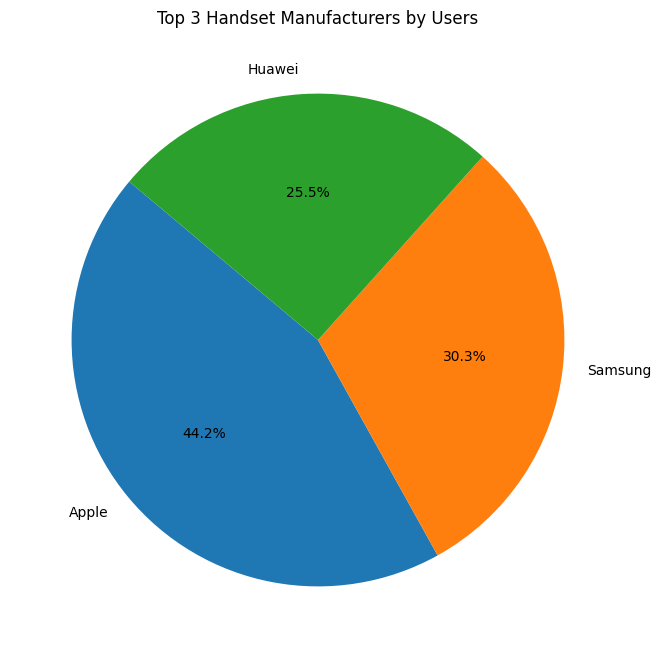

In [40]:

manufacturer_counts = df['handset_manufacturer'].value_counts().head(3)
plot.plot_pie(manufacturer_counts, title='Top 3 Handset Manufacturers by Users', label=df['handset_manufacturer'].value_counts().head(3).index)

c:\Users\user\Downloads\ten_academy\week1\Week1-10Academy-User-Analysis\src\plots.py:29: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




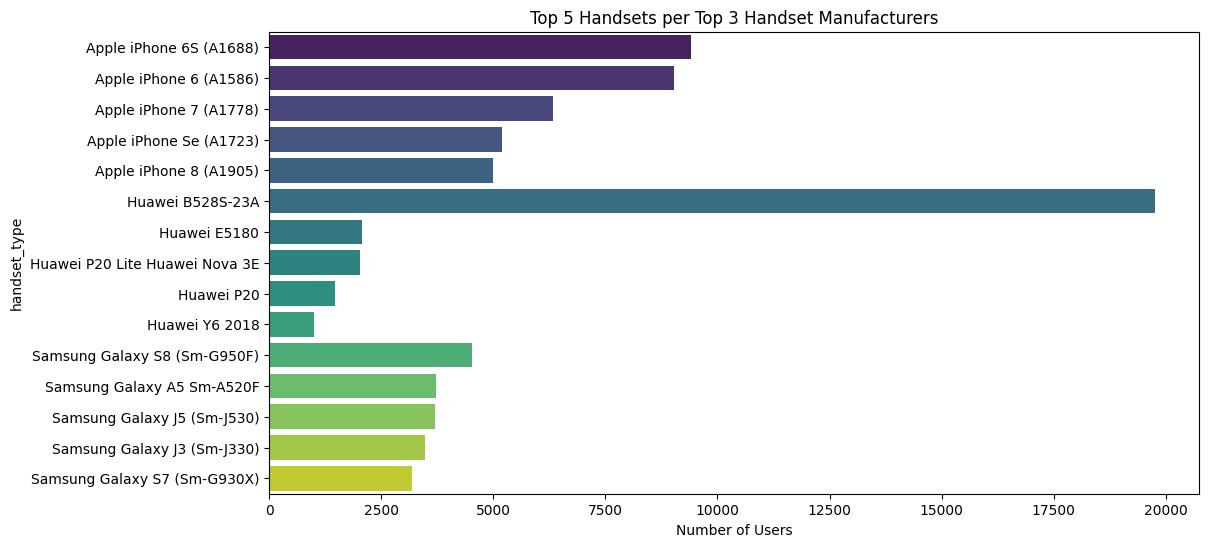

In [42]:
top_manufacturers = df['handset_manufacturer'].value_counts().head(3).index

# Filter the DataFrame to include only the top 3 manufacturers
df_top_manufacturers = df[df['handset_manufacturer'].isin(top_manufacturers)]

# Get the top 5 handsets for each manufacturer
top_handsets_per_manufacturer = (
    df_top_manufacturers
    .groupby('handset_manufacturer')['handset_type']
    .value_counts()
    .groupby(level=0, group_keys=False)
    .nlargest(5)
    .reset_index(name='Count')
)

plot.plot_bar(x=top_handsets_per_manufacturer['Count'], y=top_handsets_per_manufacturer['handset_type'], xlabel='Number of Users', title='Top 5 Handsets per Top 3 Handset Manufacturers',ylabel='handset_type',palette='Blues_d')

In [44]:
df_query["social_media"] = df_query["Social Media DL (Bytes)"] + df_query['Social Media UL (Bytes)']
df_query["google"] = df_query["Google DL (Bytes)"] + df_query["Google UL (Bytes)"]
df_query['email'] = df_query["Email DL (Bytes)"] + df_query["Email UL (Bytes)"]
df_query['youtube'] = df_query["Youtube DL (Bytes)"] + df_query["Youtube UL (Bytes)"]
df_query['netflix'] = df_query["Netflix DL (Bytes)"] + df_query["Netflix UL (Bytes)"]
df_query["gaming"] = df_query["Gaming DL (Bytes)"] + df_query["Gaming UL (Bytes)"]
df_query['other'] = df_query["Other DL (Bytes)"]+df_query["Other UL (Bytes)"]
df_query['total_data'] = df_query['Total DL (Bytes)'] + df_query['Total UL (Bytes)']